In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [119]:
df= pd.read_csv('Flight_Booking.csv').drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [120]:
df.shape

(300153, 11)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [123]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Observations
1.  No Null Values
2.  Lot of Columns are of object type 

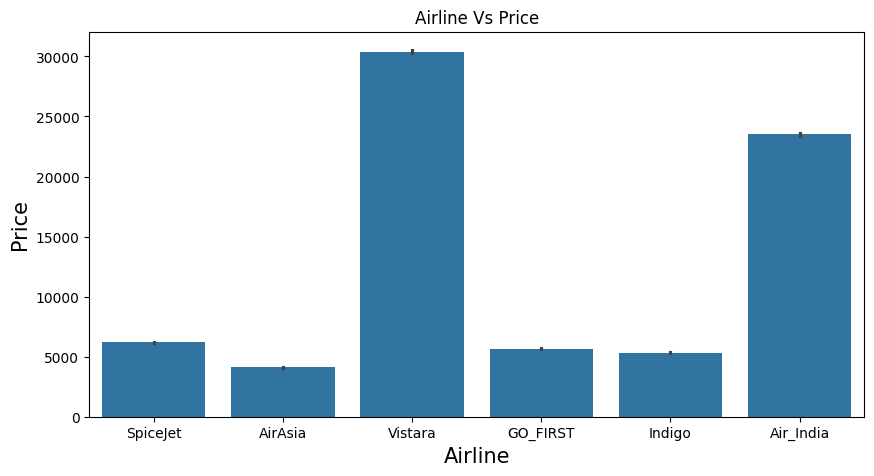

In [124]:
## Visualizations
plt.figure(figsize=(10, 5))
sns.barplot(data= df, x='airline', y='price')
plt.title('Airline Vs Price')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

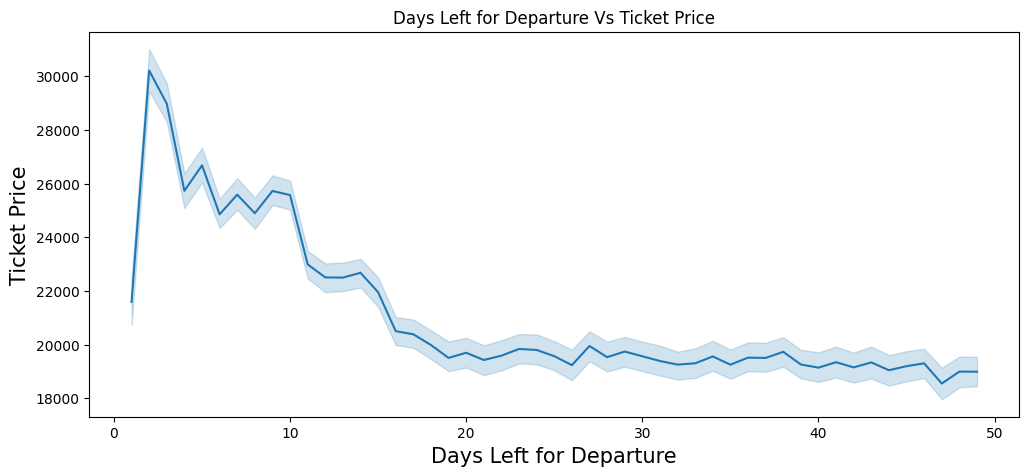

In [125]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='days_left', y='price')
plt.title('Days Left for Departure Vs Ticket Price')
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Ticket Price', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Economy Vs Business Class Prices')

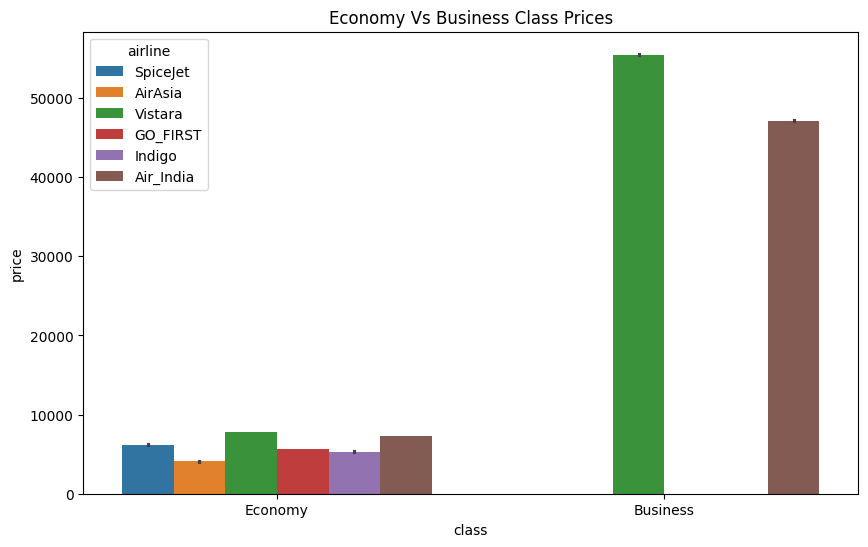

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(x='class', y='price', data=df, hue='airline')
plt.title('Economy Vs Business Class Prices')

<Axes: xlabel='days_left', ylabel='price'>

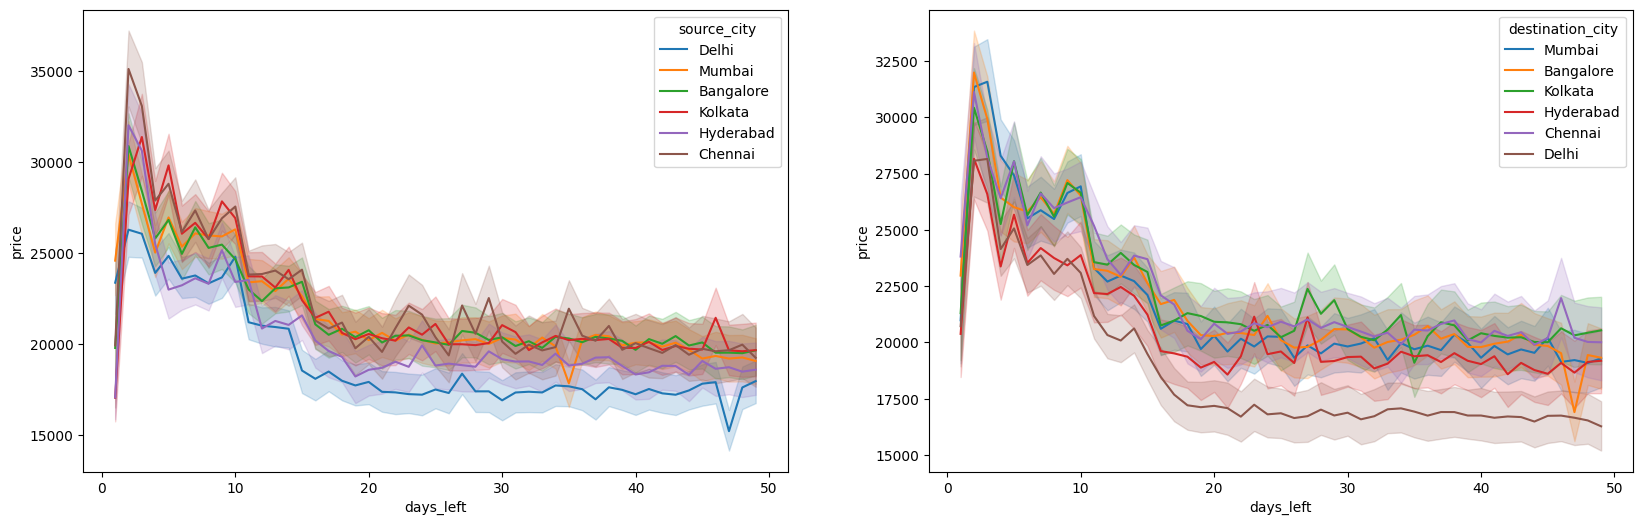

In [127]:
fig, ax= plt.subplots(1, 2, figsize=(20,6))
sns.lineplot(data=df, x='days_left', y='price', hue='source_city', ax=ax[0])
sns.lineplot(data=df, x='days_left', y='price', hue='destination_city', ax=ax[1])

In [128]:
def count_plot_categorical_feature(df, feature):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature)
    plt.title(f'frequency of {feature}')

In [129]:
cols_cat= [cols for cols in df.columns if df[cols].dtype=='object']

In [130]:
cols_cat

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

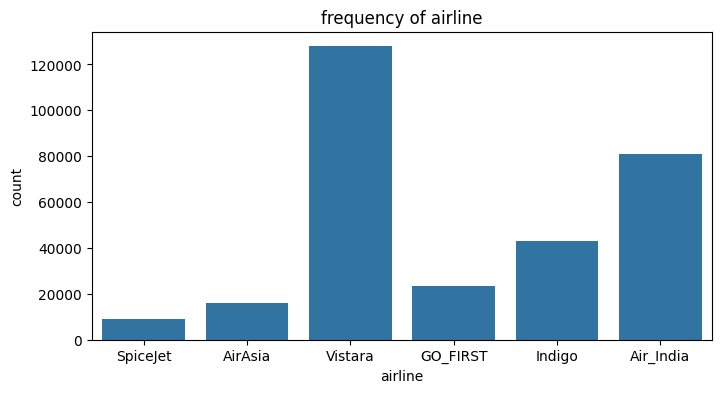

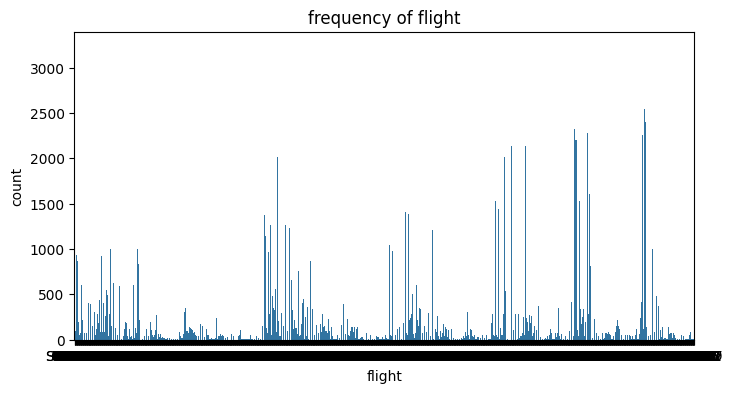

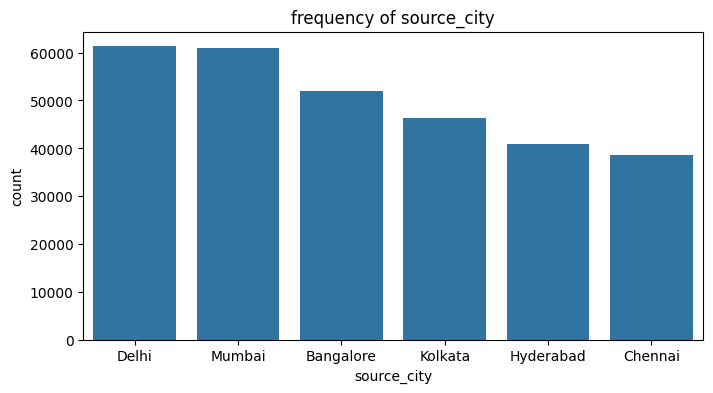

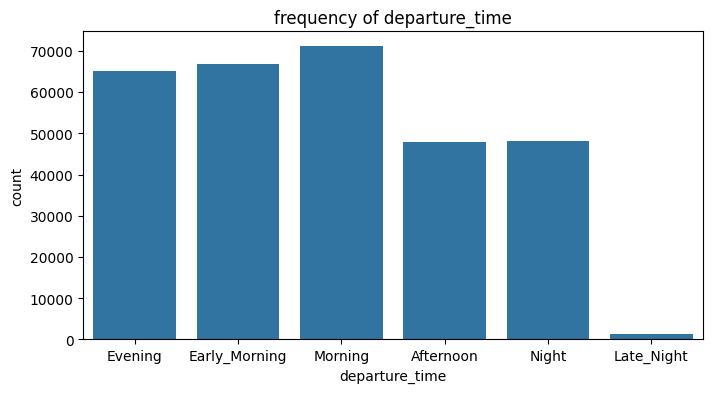

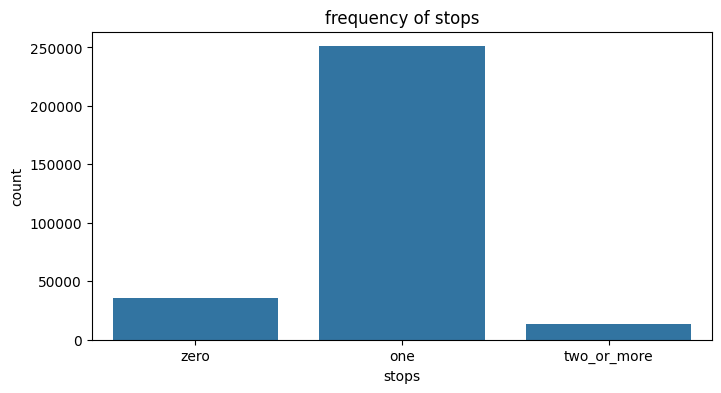

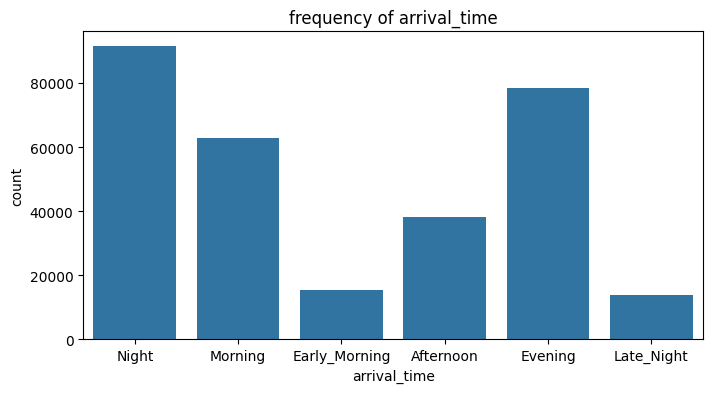

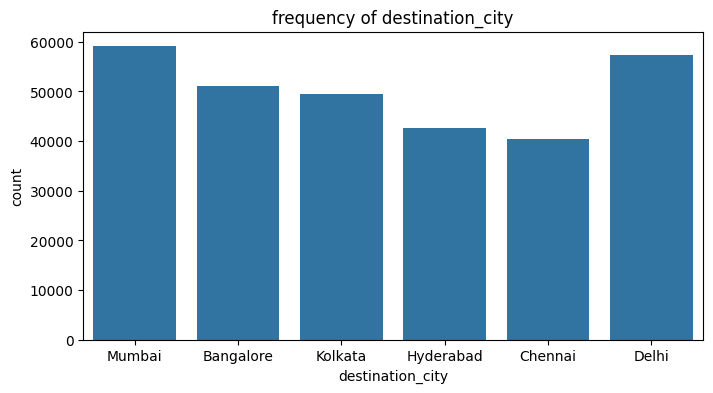

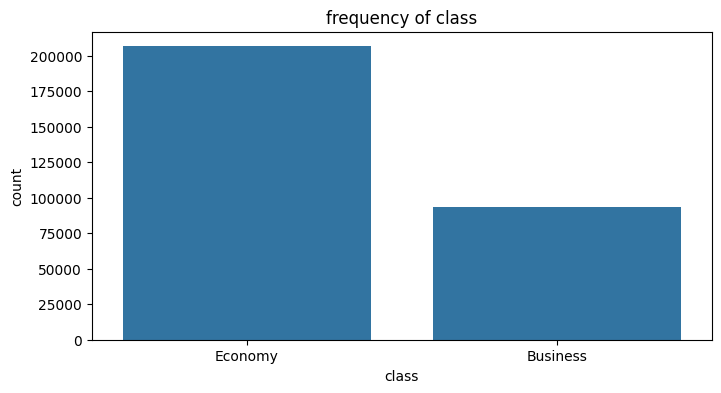

In [131]:
for i in cols_cat:
    count_plot_categorical_feature(df, i)

## Observations
1.  Diff Airlines have diff prices with Vistara and Air_India with highest prices. (might also be due to some reason)
2.  Ticket Price increases with less days left for the flight. This is true for all sources and destinations.
3.  Vistara and Air_India are only airlines providing business class. This is also the reason for high prices of these two in point 1. 
4.  Count plots shows:
    - Vistara is the most famous airline followed by Air_India
    - Delhi and Mumbai are most busy cities followed by Bangalore and Kolkata.
    - Most people travel by economic class(make sense for budget).
    - Most People prefer to leave early_morning, morning, evening.
    - As the departue times are picked the arrival times should evening and night which can also be confirmed by graphs.

# Preparing data

### Categorical -> Numerical

In [145]:
cols_cat

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [146]:
from sklearn.preprocessing import LabelEncoder

for i in cols_cat:
    le= LabelEncoder()
    if i == 'flight':
        continue
    else:
        df[i] = le.fit_transform(df[i])

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


### Feature Selection

In [133]:
# df.drop(columns=['flight'], inplace=True, axis=1)

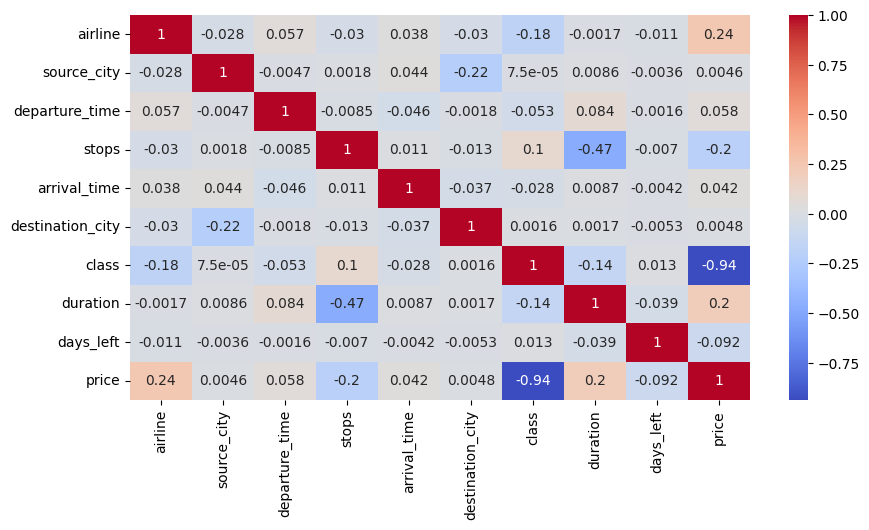

In [148]:
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(columns=['flight'], axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
col_list=[]
for col in df.columns:  
    if ((df[col].dtype != "object") & (col != 'price')):
        col_list.append(col)

X= df[col_list]
vif_data= pd.DataFrame()
vif_data["feature"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


## Linear Regression

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [152]:
X= df.drop(columns=['flight', 'price'])
print(X.columns)
y= df['price']

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')


In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [155]:
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
y_pred

array([ 4585.88050973, 52842.07707275,  7877.98018389, ...,
        5848.96550017, -1498.06191817, 58762.40634474])

In [156]:
diff= pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_Value', 'Predicted_Value'])

In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [158]:
print(r2_score(y_test, y_pred))

0.904554350718816


In [159]:
mean_absolute_error(y_test, y_pred)

4624.994868017024

In [160]:
mean_absolute_percentage_error(y_test, y_pred)

0.43535810896835475

In [161]:
np.sqrt(mean_squared_error(y_test, y_pred))

7014.309680483318

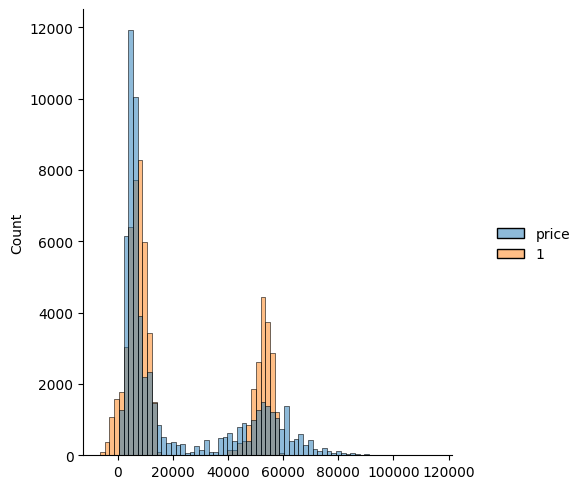

In [162]:
sns.displot([y_test, y_pred], legend=['Actual', 'Pred'])


In [163]:
diff.head()

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177


In [164]:
diff.sort_values(by='Predicted_Value')             ## WOW!! some -ve values are predicted         which is not good

,Actual_Value,Predicted_Value
10092,1443.0,-6482.824614
13099,1714.0,-6369.958870
20605,2124.0,-6288.588041
49057,1776.0,-6281.344988
20625,1603.0,-6159.282439
...,...,...
40315,80077.0,59406.967532
20083,74640.0,59440.563424
39507,86335.0,59564.550091
43866,74640.0,59649.024997


## Decision Tree Regressor

In [165]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

In [166]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9755139267133546
1176.7843419788667
0.07388791226119801
3552.7646598915094


In [168]:
diff= pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_Value', 'Predicted_Value'])
diff

,Actual_Value,Predicted_Value
0,7366.0,7366.0
1,64831.0,72783.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3001.0
60028,6734.0,6314.0
60029,5082.0,5082.0


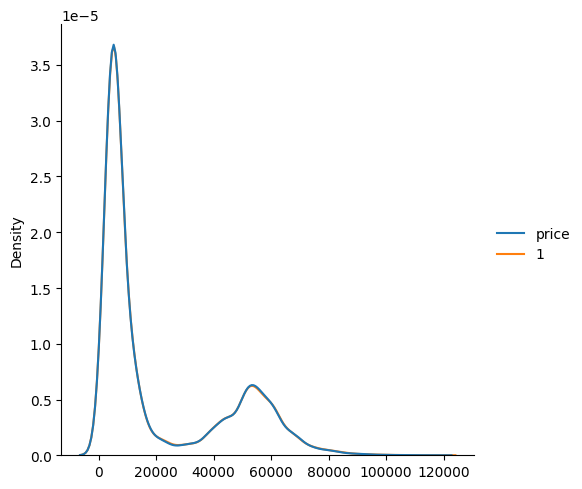

In [173]:
sns.displot([y_test, y_pred], kind='kde')

## Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [175]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9850115716329708
1088.3249040317264
0.07028457319440687
2779.616723913644


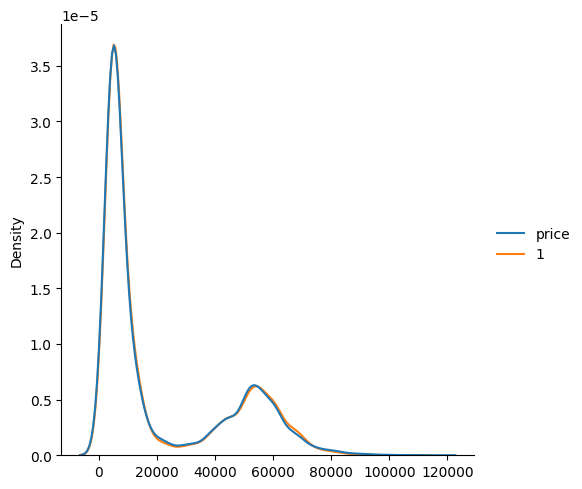

In [176]:
sns.displot([y_test, y_pred], kind='kde')